<a href="https://colab.research.google.com/github/bhogasena/Loan_Default_Analysis/blob/main/Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as py
pd.set_option('display.max_rows',None)
pd.options.display.max_columns=None
pd.options.display.float_format = '{:.2f}'.format 

In [300]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [301]:
df_loan = pd.read_csv('loan.csv',low_memory=False)
df_loan.shape

(39717, 111)

In [302]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Data Cleaning**

*   Drop the Columns which have all NaN Values.
*   Analyze the columns which have more NaN values to see if we can ignore or not (ex:mths_since_last_record, mths_since_last_delinq,next_pymnt_d).
*   Drop the Unnecessary columns





 





In [304]:
df_loan.dropna(axis=1,how='all',inplace=True)   #drop the columns which have all NaN Values
df_loan.drop(df_loan.loc[:,list((df_loan.isna().sum()/len(df_loan.index))*100> 70)].columns,axis=1,inplace=True)  #drop the columns where >70% values are NaN


In [305]:
df_loan.loc[:,df_loan.nunique()==1].columns

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [306]:
df_loan.drop(df_loan.loc[:,(df_loan.nunique()==1).values.tolist()].columns,axis=1,inplace=True)  #drop columns which has same value in all rows

In [315]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   loan_amnt                39717 non-null  int64         
 2   funded_amnt              39717 non-null  int64         
 3   funded_amnt_inv          39717 non-null  float64       
 4   term                     39717 non-null  object        
 5   int_rate                 39717 non-null  float64       
 6   installment              39717 non-null  float64       
 7   grade                    39717 non-null  object        
 8   sub_grade                39717 non-null  object        
 9   emp_length               39717 non-null  int64         
 10  home_ownership           39717 non-null  object        
 11  annual_inc               39717 non-null  float64       
 12  verification_status      39717 n

In [308]:
df_loan.drop(['member_id','emp_title','url','desc','zip_code'],axis=1,inplace=True)




**Investigate each column and do stuff**

*   Fill the NaN Values
*   Convert the DataTypes






In [309]:
df_loan['emp_length'] = df_loan.emp_length.str.extract('(\d+)') # Convert Employment experience to number 

percent_cols=['int_rate','revol_util']
df_loan[percent_cols] = df_loan[percent_cols].apply(lambda x: x.str.strip('%'));


In [311]:
df_loan.fillna({'emp_length':0,'title':'Unknown'},inplace=True)
date_cols=['issue_d','last_pymnt_d']
df_loan[date_cols] = df_loan[date_cols].apply(lambda x: pd.to_datetime(x,format='%b-%y'))

In [314]:
numeric_cols=['int_rate','emp_length','revol_util']
df_loan[numeric_cols] = df_loan[numeric_cols].apply(pd.to_numeric)

In [312]:
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,May-16,0.00
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Sep-13,0.00
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,May-16,0.00
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,35.00,10,0,5598,21,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,Apr-16,0.00
4,1075358,3000,3000,3000.00,60 months,12.69,67.79,B,B5,1,RENT,80000.00,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,Jan-96,0,38.00,15,0,27783,53.90,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,May-16,0.00


In [269]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               39717 non-null  int64  
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

**Data Analysis** 

**Univariate Analysis**

In [319]:
px.box(data_frame=df_loan,y='loan_amnt', title='Loan Amount Distributions')

In [320]:
px.box(data_frame=df_loan,y='annual_inc', title='Annual Income Distributions')

As per above Annual Income plot there are outliers and let's take only 0.99 Quantile

In [329]:
df_loan.drop(df_loan[df_loan.annual_inc > df_loan.annual_inc.quantile(.99)].index,inplace=True)

Let's Recheck again Box Plot for Annual Income

In [330]:
px.box(data_frame=df_loan,y='annual_inc', title='Annual Income Distributions')

In [116]:
px.box(data_frame=df_loan,y='annual_inc',color='loan_status')


In [126]:
df_loan_annual_lt_100k = df_loan[df_loan.annual_inc<=100000].copy()
df_loan_annual_100_200 = df_loan[(df_loan.annual_inc>100000) & (df_loan.annual_inc<=220000)].copy()
df_loan_annual_gt_220 = df_loan[(df_loan.annual_inc>220000) & (df_loan.annual_inc<=820000)].copy()
df_loan_annual_high = df_loan[df_loan.annual_inc>=820000].copy()

In [127]:
fig = px.histogram(df_loan_annual_high,x='loan_status')
fig = px.box(data_frame=df_loan_annual_high,y='annual_inc',color='loan_status')
fig.show()

df_loan_annual_high[df_loan_annual_high.loan_status=='Charged Off']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
10621,830027,1039166,15775,15775,15750.00000,60 months,12.99%,358.85000,C,C1,Stryker Instruments,2 years,MORTGAGE,1250000.00000,Verified,Jul-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,The mama of all debt consolidation loans,490xx,MI,21.81000,0,May-97,0,NaN,10,0,48258,83.20%,28,0.00000,0.00000,18301.35000,18272.56000,12799.70000,5481.50000,0.00000,20.15000,3.62700,Oct-15,358.85000,May-16,0.00000
30011,514680,665304,12000,12000,10735.48000,36 months,15.33%,417.93000,D,D3,Columbus Division of Fire,10+ years,RENT,840000.00000,Not Verified,May-10,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,NaN,moving,Honest borrower,432xx,OH,2.34000,0,Aug-94,1,NaN,15,0,36642,44.10%,38,0.00000,0.00000,4176.90000,4176.90000,2802.12000,1374.78000,0.00000,0.00000,0.00000,Mar-11,417.93000,Apr-11,0.00000


In [128]:
df_loan.pub_rec_bankruptcies.value_counts()

0.00000    37339
1.00000     1674
2.00000        7
Name: pub_rec_bankruptcies, dtype: int64

In [129]:
px.histogram(data_frame=df_loan[~(df_loan.pub_rec_bankruptcies.isna())],x='pub_rec_bankruptcies',color='loan_status',barmode='group',histnorm='probability')

In [130]:
px.histogram(data_frame=df_loan_annual_lt_100k,x='loan_amnt',color='loan_status',barmode='group',histnorm='probability',nbins=10)

In [133]:
px.box(data_frame=df_loan_annual_lt_100k,color='loan_status',y='loan_amnt')

**Less Annual Income borrowers tend to be more Risk as per below graph**

In [131]:
px.histogram(data_frame=df_loan_annual_lt_100k,x='annual_inc',color='loan_status',barmode='group',histnorm='probability',nbins=10)

In [134]:
px.box(data_frame=df_loan_annual_lt_100k,color='loan_status',y='annual_inc')

In [138]:
df_loan_annual_lt_100k['last_pymnt_d'] = pd.to_datetime(df_loan_annual_lt_100k['last_pymnt_d'],format='%b-%y')
df_loan_annual_lt_100k['issue_d'] = pd.to_datetime(df_loan_annual_lt_100k['issue_d'],format='%b-%y')
df_loan_annual_lt_100k['tot_mnths_btw_lastpay_issue_dt'] = (df_loan_annual_lt_100k['last_pymnt_d']  - df_loan_annual_lt_100k['issue_d']).dt.mon
df_loan_annual_lt_100k['tot_mnths_btw_lastpay_issue_dt'].head()

0   1127 days
1    487 days
2    913 days
3   1127 days
4   1613 days
Name: tot_mnths_btw_lastpay_issue_dt, dtype: timedelta64[ns]

In [ ]:
px.scatter(data_frame=df_loan_annual_lt_100k,x='annual_inc',color='loan_status',y='loan_amnt')

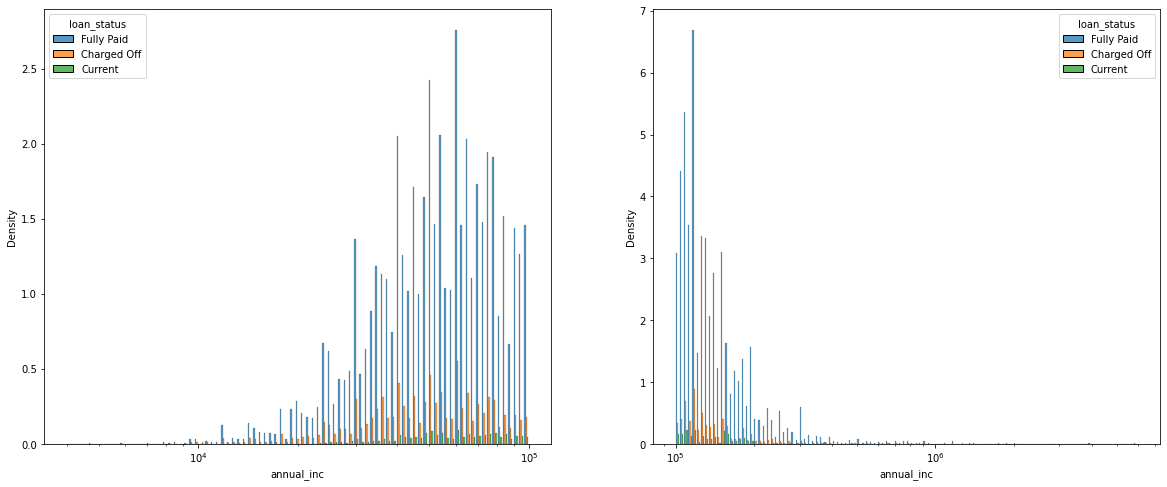

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.histplot(data=df_loan_annual_lt_100k, x='annual_inc', ax=ax[0], hue='loan_status',multiple="dodge",stat='density',shrink=.8,log_scale=True)
sns.histplot(data=df_loan_annual_gt_100k, x='annual_inc', ax=ax[1], hue='loan_status',multiple="dodge",stat='density',shrink=.8,log_scale=True)
plt.show()


In [ ]:
df_loan.annual_inc.describe()

temp=df_loan[df_loan.annual_inc>1250000  ]
px.box(data_frame=df_loan[df_loan.annual_inc<125000],y='annual_inc',color='loan_status')

**Analyze the People's Income < 125**

**As per below graph, Borrower's annual income < 50k tends to be more Risky**

In [ ]:
#px.histogram(data_frame=df_loan[df_loan.annual_inc<125000],x='annual_inc',color='loan_status',nbins=15,histnorm='probability')
fig=make_subplots(rows=2, cols=2,subplot_titles=['Annual Income : 0-150k','Annual Income : 150k-1.25M','Annual Income : 150k-1.25M','Annual Income : 150k-1.25M'])

def prepare_figures(start,end,row,col,bins):
  df_good = df_loan[ (df_loan.annual_inc>=start) &(df_loan.annual_inc<=end)& (df_loan.loan_status=='Good') ]['annual_inc']
  df_bad = df_loan[(df_loan.annual_inc>=start) &(df_loan.annual_inc<=end) & (df_loan.loan_status=='Bad')]['annual_inc']

  fig.add_trace(go.Histogram(
      x=df_good,
      histnorm='probability',
      name='Good', # name used in legend and hover labels
      marker_color='green',
      xbins=dict(
              start=start,
              end=end,
              size=(end-start)//bins), 
      autobinx=False,
      opacity=0.75),  
      row=row,
      col=col)
  fig.add_trace(go.Histogram(
      x=df_bad,
      histnorm='probability',
      name='Bad', # name used in legend and hover labels
      xbins=dict(
                 start=start,
                 end=end,
                 size=(end-start)//bins), 
      autobinx=False,
      marker_color='red',
      opacity=0.75),
      row=row,
      col=col)
prepare_figures(0,100000,1,1,10)
prepare_figures(100000,150000,1,2,10)
prepare_figures(150000,200000,2,1,10)
prepare_figures(800000,1250000,2,2,10)
fig.update_layout(bargap=0.1,xaxis_title_text='Annual Income',yaxis_title_text='probability')
fig.show()

In [ ]:
df_loan[(df_loan.annual_inc>=300000 )& (df_loan.loan_status=='Bad')]['verification_status'].value_counts()

Verified           9
Source Verified    8
Not Verified       7
Name: verification_status, dtype: int64

In [ ]:
px.box(data_frame=df_loan[(df_loan.annual_inc>125000) &(df_loan.annual_inc<250000)],y='annual_inc',color='loan_status')

In [ ]:
#px.histogram(data_frame=df_loan[df_loan.annual_inc<125000],x='annual_inc',color='loan_status',nbins=15,histnorm='probability')
df_good = df_loan[(df_loan.annual_inc>125000) &(df_loan.annual_inc<265000)  & (df_loan.loan_status=='Good')]['annual_inc']
df_bad = df_loan[(df_loan.annual_inc>125000) &(df_loan.annual_inc<265000)  & (df_loan.loan_status=='Bad')]['annual_inc']
fig= go.Figure()
fig.add_trace(go.Histogram(
    x=df_good,
    histnorm='percent',
    name='Good', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=125000,
        end=265000,
        size=10000
    ),
    marker_color='green',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=df_bad,
    histnorm='percent',
    name='Bad', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=0,
        end=125000,
        size=10000
    ),
    marker_color='red',
    opacity=0.75
))
fig.update_layout(bargap=0.1)
fig.show()